In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [34]:
img = cv2.imread('ORG_water.jpg')
gray = cv2.imread('ORG_water.jpg', 0)

In [35]:
sift = cv2.xfeatures2d.SIFT_create()

In [36]:
class_size = 22

In [37]:
BoVW = cv2.BOWKMeansTrainer(class_size)

In [38]:
keypoints, descripter = sift.detectAndCompute(gray, None)
descripters = descripter.astype(np.float32)

In [39]:
print(len(keypoints))
print(len(descripters))

10700
10700


In [40]:
descripter

array([[ 1.,  1., 59., ...,  1.,  0.,  1.],
       [ 0., 13., 49., ...,  0.,  0.,  0.],
       [23., 22.,  1., ...,  8.,  4.,  2.],
       ...,
       [ 0.,  1.,  6., ...,  5.,  1., 38.],
       [50.,  8., 49., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 96.,  1.,  0.]], dtype=float32)

In [41]:
descripters[0]

array([  1.,   1.,  59., 136.,  16.,   2.,  16.,   4., 136.,  90.,  29.,
        49.,   5.,   1.,  15.,   8., 136., 136.,  45.,  74.,  21.,   9.,
         3.,   8.,   3.,  15.,  29., 133.,  75.,  61.,   1.,   1.,  10.,
         1.,  12.,  32.,   5.,   8.,  64.,  60.,  94.,  36.,   0.,   1.,
        20.,  36.,  54.,  14., 136., 105.,  13.,  28.,  33.,  24.,   7.,
        21.,  20.,  39.,  13.,  43.,  76.,  80.,   6.,   5.,  44.,  16.,
         2.,   5.,   9.,   3.,   5.,  22.,  61.,   7.,   1.,  14.,  64.,
        14.,   4.,  12., 136.,  25.,   0.,   0.,   6.,  28.,  13.,  71.,
        26.,   6.,   0.,   0.,  24., 127.,  14.,  17.,  23.,  24.,   2.,
         4.,   4.,   0.,   0.,   0.,  19.,  13.,   2.,  11.,  29.,   3.,
         0.,   1.,  72.,  29.,   0.,   1.,   1.,   0.,   0.,   2.,   5.,
         1.,   0.,   0.,   0.,   1.,   0.,   1.], dtype=float32)

In [42]:
BoVW.add(descripters)

In [43]:
centroid = BoVW.cluster()

In [44]:
len(centroid)

22

In [45]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10, 1.0)

flags = cv2.KMEANS_RANDOM_CENTERS

compactness, label, centers = cv2.kmeans(descripters, 4, None, criteria, 10, flags)

In [46]:
len(label)

10700

(array([3643.,    0.,    0., 2557.,    0.,    0., 2530.,    0.,    0.,
        1970.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

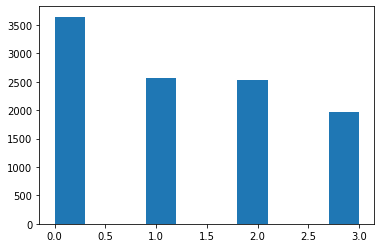

In [47]:
plt.hist(label)

In [48]:
hist, bins = np.histogram(label)

In [49]:
hist

array([3643,    0,    0, 2557,    0,    0, 2530,    0,    0, 1970])